In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [112]:
df = pd.read_csv('kl.csv', encoding = "ISO-8859-1")

### EDA

In [113]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31.0,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94.0,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5M
1,1,20801,Cristiano Ronaldo,33.0,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94.0,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1M
2,2,190871,Neymar Jr,26.0,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92.0,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1M
3,3,193080,De Gea,27.0,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91.0,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6M
4,4,192985,K. De Bruyne,27.0,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91.0,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4M


In [114]:
df.isna().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  1
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [115]:
cat_variables = ["ID", "Name", "Photo", "Nationality", "Flag", "Club", "Club Logo", "Value", "Wage", "Preferred Foot", "Weak Foot", "Work Rate", "Body Type", "Real Face", "Position", "Jersey Number", "Joined", "Loaned From", "Contract Valid Until", "Height", "Weight", "LS", "ST", "RS", "LW", "LF", "CF", "RF", "RW", "LAM", "CAM", "RAM", "LM", "LCM", "CM", "RCM", "RM", "LWB", "LDM", "CDM", "RDM", "RWB", "LB", "LCB", "CB", "RCB", "RB", "Release Clause"]

### Стандартизация данных

In [116]:
numerical_features = df.select_dtypes(include=['float64', 'int64'])

In [117]:
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(numerical_features), columns=numerical_features.columns)

In [118]:
df_standardized.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,1.820700e+04,1.820600e+04,1.820600e+04,1.820700e+04,1.820700e+04,1.815900e+04,1.815900e+04,1.815900e+04,1.814700e+04,...,1.815900e+04,1.815900e+04,1.815900e+04,1.815900e+04,1.815900e+04,1.815900e+04,1.815900e+04,1.815900e+04,1.815900e+04,1.815900e+04
mean,0.000000,-1.373708e-16,-6.244471e-17,1.248894e-16,6.993423e-16,-1.748356e-16,-1.690371e-16,-2.692072e-16,2.504253e-17,-1.252955e-17,...,-8.764886e-17,1.502552e-16,-3.756380e-17,-7.512760e-17,-1.001701e-16,-1.001701e-16,-6.730181e-17,9.390950e-18,6.573665e-17,-1.408642e-17
std,1.000027,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,...,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00
min,-1.731956,-7.151226e+00,-1.953374e+00,-2.930046e+00,-3.798249e+00,-3.180037e+00,-2.873512e-01,-2.948496e+00,-1.800331e+00,-1.162960e+00,...,-2.773156e+00,-4.866138e+00,-2.224777e+00,-2.109448e+00,-2.003962e+00,-8.825287e-01,-9.103987e-01,-9.230204e-01,-9.034118e-01,-8.750329e-01
25%,-0.865978,-4.666480e-01,-8.826855e-01,-6.135122e-01,-7.019345e-01,-5.165847e-01,-2.873512e-01,7.979724e-02,-4.778307e-01,-7.240145e-01,...,-6.080507e-01,-6.687999e-01,-8.682553e-01,-9.554285e-01,-1.017516e+00,-4.869336e-01,-4.963552e-01,-4.988399e-01,-4.924738e-01,-4.851612e-01
50%,0.000000,2.489840e-01,-2.613500e-02,-3.437870e-02,-5.007872e-02,1.364381e-01,-2.873512e-01,7.979724e-02,-4.778307e-01,-1.596566e-01,...,2.874506e-02,1.182011e-01,2.873000e-01,3.370737e-01,2.977453e-01,-3.173929e-01,-3.189079e-01,-3.170483e-01,-3.163576e-01,-3.180733e-01
75%,0.865978,7.419186e-01,6.162779e-01,6.895382e-01,6.017770e-01,6.940755e-01,-2.873512e-01,7.979724e-02,8.446701e-01,4.047013e-01,...,7.292204e-01,7.303130e-01,8.399570e-01,8.448424e-01,8.614286e-01,-1.478522e-01,-1.414607e-01,-1.352567e-01,-1.402413e-01,-1.509855e-01
max,1.731956,1.078668e+00,4.256617e+00,4.019556e+00,3.861056e+00,2.744861e+00,9.864420e+00,3.108090e+00,3.489672e+00,4.982271e+00,...,2.766967e+00,3.266205e+00,2.347203e+00,2.091184e+00,2.129716e+00,4.147180e+00,4.472167e+00,4.530728e+00,4.321371e+00,4.304691e+00


### Анализ важности признаков

Мы хотим предсказать общий рейтинг игрока, поэтому выбираем Overall как нашу целевую переменную

In [119]:
target_variable = "Overall"

In [120]:
X = df_standardized.drop(columns=[target_variable])
y = df_standardized[target_variable]

In [121]:
df.drop(columns=cat_variables)

,Unnamed: 0,Age,Overall,Potential,Special,International Reputation,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,31.0,94.0,94,2202,5.0,4.0,84.0,95.0,70.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,1,33.0,94.0,94,2228,5.0,5.0,84.0,94.0,89.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,2,26.0,92.0,93,2143,5.0,5.0,79.0,87.0,62.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,3,27.0,91.0,93,1471,4.0,1.0,17.0,13.0,21.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,4,27.0,91.0,92,2281,4.0,4.0,93.0,82.0,55.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,19.0,47.0,65,1307,1.0,2.0,34.0,38.0,40.0,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,18203,19.0,47.0,63,1098,1.0,2.0,23.0,52.0,52.0,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,18204,16.0,47.0,67,1189,1.0,2.0,25.0,40.0,46.0,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,18205,17.0,47.0,66,1228,1.0,2.0,44.0,50.0,39.0,...,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


Определение значимых признаков

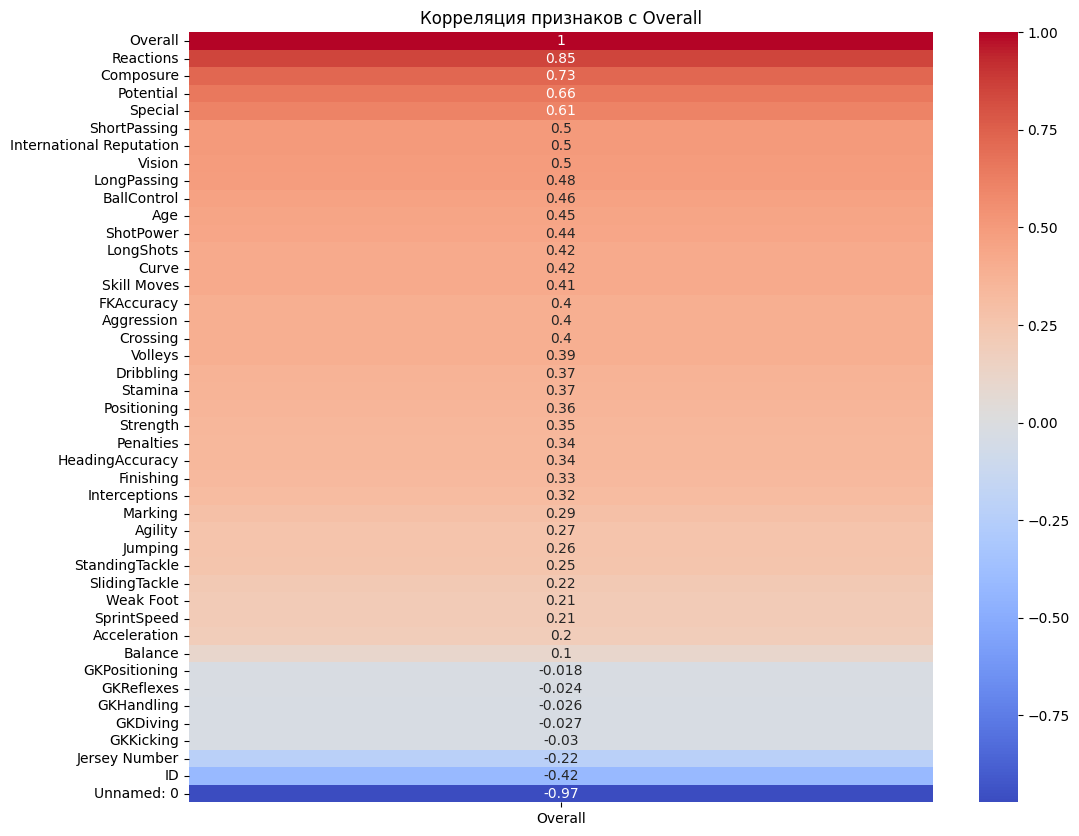

In [122]:
correlation_matrix = df_standardized.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[[target_variable]].sort_values(by=target_variable, ascending=False), annot=True, cmap="coolwarm")
plt.title("Корреляция признаков с Overall")
plt.show()